In [8]:
import scipy, pandas, numpy
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
import seaborn as sns

df = pandas.read_csv('sme_finance_monitor_q2_2018-q3_2020v2.csv')
print(df.columns)

Index(['uniq_id', 'serial', 'weight', 'pcode', 'dwave', 'banused', 'disgeg',
       'futfin_1', 'futfin_2', 'futfin_3',
       ...
       'q144', 'q144b', 'q145', 'q150', 'q152152_1', 'q151152_2', 'q151152_3',
       'q151152_4', 'q151152_5', 'q153'],
      dtype='object', length=2246)


In [2]:
df_new = df
df_new['outcome'] = -1

df_new.loc[((df_new['q57_1']>0)&(df_new['q57_1']<5))|((df_new['q57_2']>0)&(df_new['q57_2']<5))|
            ((df_new['q57_3']>0)&(df_new['q57_3']<5))|((df_new['q57_4']>0)&(df_new['q57_4']<5))|
            ((df_new['q57_7']>0)&(df_new['q57_7']<5))|((df_new['q57_8']>0)&(df_new['q57_8']<5))|
            ((df_new['q57_9']>0)&(df_new['q57_9']<5))|((df_new['q57_10']>0)&(df_new['q57_10']<5))|
            ((df_new['q57_11']>0)&(df_new['q57_11']<5))|((df_new['q57_12']>0)&(df_new['q57_12']<5))|
            ((df_new['q57_13']>0)&(df_new['q57_13']<5))|((df_new['q57_14']>0)&(df_new['q57_14']<5))|
            ((df_new['q57_15']>0)&(df_new['q57_15']<5))|((df_new['q57_16']>0)&(df_new['q57_16']<5))|
            ((df_new['q39_1_1']>0)&(df_new['q39_1_1']<5))|((df_new['q39_2_1']>0)&(df_new['q39_2_1']<5))|
            ((df_new['q39_3_1']>0)&(df_new['q39_3_1']<5))|((df_new['q39_4_1']>0)&(df_new['q39_4_1']<5))|
            ((df_new['q39_1_2']>0)&(df_new['q39_1_2']<5))|((df_new['q39_2_2']>0)&(df_new['q39_2_2']<5))|
            ((df_new['q39_3_2']>0)&(df_new['q39_3_2']<5))|((df_new['q39_4_2']>0)&(df_new['q39_4_2']<5))|
            ((df_new['q39_1_3']>0)&(df_new['q39_1_3']<5))|((df_new['q39_2_3']>0)&(df_new['q39_2_3']<5))|
            ((df_new['q39_3_3']>0)&(df_new['q39_3_3']<5))|((df_new['q39_4_3']>0)&(df_new['q39_4_3']<5))|
            ((df_new['q39_1_4']>0)&(df_new['q39_1_4']<5))|((df_new['q39_2_4']>0)&(df_new['q39_2_4']<5))|
            ((df_new['q39_3_4']>0)&(df_new['q39_3_4']<5))|((df_new['q39_4_4']>0)&(df_new['q39_4_4']<5))|
            ((df_new['q39_1_7']>0)&(df_new['q39_1_7']<5))|((df_new['q39_2_7']>0)&(df_new['q39_2_7']<5))|
            ((df_new['q39_3_7']>0)&(df_new['q39_3_7']<5))|((df_new['q39_4_7']>0)&(df_new['q39_4_7']<5))|
            ((df_new['q39_1_8']>0)&(df_new['q39_1_8']<5))|((df_new['q39_2_8']>0)&(df_new['q39_2_8']<5))|
            ((df_new['q39_3_8']>0)&(df_new['q39_3_8']<5))|((df_new['q39_4_8']>0)&(df_new['q39_4_8']<5))|
            ((df_new['q39_1_9']>0)&(df_new['q39_1_9']<5))|((df_new['q39_2_9']>0)&(df_new['q39_2_9']<5))|
            ((df_new['q39_3_9']>0)&(df_new['q39_3_9']<5))|((df_new['q39_4_9']>0)&(df_new['q39_4_9']<5))|
            ((df_new['q39_1_10']>0)&(df_new['q39_1_10']<5))|((df_new['q39_2_10']>0)&(df_new['q39_2_10']<5))|
            ((df_new['q39_3_10']>0)&(df_new['q39_3_10']<5))|((df_new['q39_4_10']>0)&(df_new['q39_4_10']<5))|
            ((df_new['q39_1_11']>0)&(df_new['q39_1_11']<5))|((df_new['q39_2_11']>0)&(df_new['q39_2_11']<5))|
            ((df_new['q39_3_11']>0)&(df_new['q39_3_11']<5))|((df_new['q39_4_11']>0)&(df_new['q39_4_11']<5))|
            ((df_new['q39_1_12']>0)&(df_new['q39_1_12']<5))|((df_new['q39_2_12']>0)&(df_new['q39_2_12']<5))|
            ((df_new['q39_3_12']>0)&(df_new['q39_3_12']<5))|((df_new['q39_4_12']>0)&(df_new['q39_4_12']<5))|
            ((df_new['q39_1_13']>0)&(df_new['q39_1_13']<5))|((df_new['q39_2_13']>0)&(df_new['q39_2_13']<5))|
            ((df_new['q39_3_13']>0)&(df_new['q39_3_13']<5))|((df_new['q39_4_13']>0)&(df_new['q39_4_13']<5))|
            ((df_new['q39_1_14']>0)&(df_new['q39_1_14']<5))|((df_new['q39_2_14']>0)&(df_new['q39_2_14']<5))|
            ((df_new['q39_3_14']>0)&(df_new['q39_3_14']<5))|((df_new['q39_4_14']>0)&(df_new['q39_4_14']<5))|
            ((df_new['q39_1_15']>0)&(df_new['q39_1_15']<5))|((df_new['q39_2_15']>0)&(df_new['q39_2_15']<5))|
            ((df_new['q39_3_15']>0)&(df_new['q39_3_15']<5))|((df_new['q39_4_15']>0)&(df_new['q39_4_15']<5))|
            ((df_new['q39_1_16']>0)&(df_new['q39_1_16']<5))|((df_new['q39_2_16']>0)&(df_new['q39_2_16']<5))|
            ((df_new['q39_3_16']>0)&(df_new['q39_3_16']<5))|((df_new['q39_4_16']>0)&(df_new['q39_4_16']<5))|
            ((df_new['q39_1_18']>0)&(df_new['q39_1_18']<5))|((df_new['q39_2_18']>0)&(df_new['q39_2_18']<5))|
            ((df_new['q39_3_18']>0)&(df_new['q39_3_18']<5))|((df_new['q39_4_18']>0)&(df_new['q39_4_18']<5))
            ,'outcome'] = 1
# df_new.loc[(df_new['q57_1']<0)&(df_new['q57_2']<0)&(df_new['q57_3']<0)&
#         (df_new['q57_4']<0)&(df_new['q57_7']<0)&(df_new['q57_8']<0)&
#         (df_new['q57_9']<0)&(df_new['q57_10']<0)&
#         (df_new['q57_11']<0)&(df_new['q57_12']<0)&(df_new['q57_13']<0)&
#         (df_new['q57_14']<0)&(df_new['q57_15']<0)&(df_new['q57_16']<0)&
#         (df_new['q39_1_1']<0)&(df_new['q39_2_1']<0)&(df_new['q39_3_1']<0)&(df_new['q39_4_1']<0)&
#         (df_new['q39_1_2']<0)&(df_new['q39_2_2']<0)&(df_new['q39_3_2']<0)&(df_new['q39_4_2']<0)&
#         (df_new['q39_1_3']<0)&(df_new['q39_2_3']<0)&(df_new['q39_3_3']<0)&(df_new['q39_4_3']<0)&
#         (df_new['q39_1_4']<0)&(df_new['q39_2_4']<0)&(df_new['q39_3_4']<0)&(df_new['q39_4_4']<0)&
#         (df_new['q39_1_7']<0)&(df_new['q39_2_7']<0)&(df_new['q39_3_7']<0)&(df_new['q39_4_7']<0)&
#         (df_new['q39_1_8']<0)&(df_new['q39_2_8']<0)&(df_new['q39_3_8']<0)&(df_new['q39_4_8']<0)&
#         (df_new['q39_1_9']<0)&(df_new['q39_2_9']<0)&(df_new['q39_3_9']<0)&(df_new['q39_4_9']<0)&
#         (df_new['q39_1_10']<0)&(df_new['q39_2_10']<0)&(df_new['q39_3_10']<0)&(df_new['q39_4_10']<0)&
#         (df_new['q39_1_11']<0)&(df_new['q39_2_11']<0)&(df_new['q39_3_11']<0)&(df_new['q39_4_11']<0)&
#         (df_new['q39_1_12']<0)&(df_new['q39_2_12']<0)&(df_new['q39_3_12']<0)&(df_new['q39_4_12']<0)&
#         (df_new['q39_1_13']<0)&(df_new['q39_2_13']<0)&(df_new['q39_3_13']<0)&(df_new['q39_4_13']<0)&
#         (df_new['q39_1_14']<0)&(df_new['q39_2_14']<0)&(df_new['q39_3_14']<0)&(df_new['q39_4_14']<0)&
#         (df_new['q39_1_15']<0)&(df_new['q39_2_15']<0)&(df_new['q39_3_15']<0)&(df_new['q39_4_15']<0)&
#         (df_new['q39_1_16']<0)&(df_new['q39_2_16']<0)&(df_new['q39_3_16']<0)&(df_new['q39_4_16']<0)&
#         (df_new['q39_1_18']<0)&(df_new['q39_2_18']<0)&(df_new['q39_3_18']<0)&df_new['q39_4_18']<0
#         ,'outcome'] = -1
df_new.loc[(df_new['q57_1']==5)|(df_new['q57_2']==5)|(df_new['q57_3']==5)|
            (df_new['q57_4']==5)|(df_new['q57_7']==5)|(df_new['q57_8']==5)|
            (df_new['q57_9']==5)|(df_new['q57_10']==5)|(df_new['q57_11']==5)|
            (df_new['q57_12']==5)|(df_new['q57_13']==5)|(df_new['q57_14']==5)|
            (df_new['q57_15']==5)|(df_new['q57_16']==5)|
            (df_new['q39_1_1']==5)|(df_new['q39_2_1']==5)|(df_new['q39_3_1']==5)|(df_new['q39_4_1']==5)|
            (df_new['q39_1_2']==5)|(df_new['q39_2_2']==5)|(df_new['q39_3_2']==5)|(df_new['q39_4_2']==5)|
            (df_new['q39_1_3']==5)|(df_new['q39_2_3']==5)|(df_new['q39_3_3']==5)|(df_new['q39_4_3']==5)|
            (df_new['q39_1_4']==5)|(df_new['q39_2_4']==5)|(df_new['q39_3_4']==5)|(df_new['q39_4_4']==5)|
            (df_new['q39_1_7']==5)|(df_new['q39_2_7']==5)|(df_new['q39_3_7']==5)|(df_new['q39_4_7']==5)|
            (df_new['q39_1_8']==5)|(df_new['q39_2_8']==5)|(df_new['q39_3_8']==5)|(df_new['q39_4_8']==5)|
            (df_new['q39_1_9']==5)|(df_new['q39_2_9']==5)|(df_new['q39_3_9']==5)|(df_new['q39_4_9']==5)|
            (df_new['q39_1_10']==5)|(df_new['q39_2_10']==5)|(df_new['q39_3_10']==5)|(df_new['q39_4_10']==5)|
            (df_new['q39_1_11']==5)|(df_new['q39_2_11']==5)|(df_new['q39_3_11']==5)|(df_new['q39_4_11']==5)|
            (df_new['q39_1_12']==5)|(df_new['q39_2_12']==5)|(df_new['q39_3_12']==5)|(df_new['q39_4_12']==5)|
            (df_new['q39_1_13']==5)|(df_new['q39_2_13']==5)|(df_new['q39_3_13']==5)|(df_new['q39_4_13']==5)|
            (df_new['q39_1_14']==5)|(df_new['q39_2_14']==5)|(df_new['q39_3_14']==5)|(df_new['q39_4_14']==5)|
            (df_new['q39_1_15']==5)|(df_new['q39_2_15']==5)|(df_new['q39_3_15']==5)|(df_new['q39_4_15']==5)|
            (df_new['q39_1_16']==5)|(df_new['q39_2_16']==5)|(df_new['q39_3_16']==5)|(df_new['q39_4_16']==5)|
            (df_new['q39_1_18']==5)|(df_new['q39_2_18']==5)|(df_new['q39_3_18']==5)|(df_new['q39_4_18']==5)
,'outcome'] = 0
# print(df_new['q39_1_18']<0)
print(df_new['outcome'].value_counts())
df_new=df_new[~df_new['outcome'].isin([-1])]
print(df_new['outcome'].value_counts())

-1    42690
 1     2053
 0      275
Name: outcome, dtype: int64
1    2053
0     275
Name: outcome, dtype: int64


In [3]:
df_final = df_new[['outcome','risk','q126','q144','q7q8','q9','q11','q11a','q12','q13','q13a','q13b','q14a','q14y','q14ysu2',
'q15_1','q15_2','q15_3','q15_4','q15_5','q15_6','q15_7','q15_8','q15_9','q15_10','q15_11','q15_12','q15_13','q15_14','q15_15','q15_16','q15_17','q15_18','q15_19','q15_20',
'q15b_1','q15b_2','q15b_3','q15c','q15d2','q15z','q17_1','q17_2','q17_3','q17_4','q17_5','q17_6','q17_7','q17_8','q17_9','q17_10','q17_11','q17_12','q17_13','q17_14','q17_15','q17_16','q17_17','q17_18','q17_19',
'q24a','q24b','q24c','q26_1','q26_2','q26_3','q26_4','q26_5','q26_6','q26_7','q26_8','q26_9','q26_10','q26_11','q26_12','q26_13','q26_14','q26_15','q26_16','q26_17','q26_18','q26_19','q26_20','q26_21','q26_22','q26_23',
'q27','q28_1','q28_2','q28_3','q28_4','q28_5','q28_6','q28_7','q28_8','q28_9','q28_10','q28_11','q28_12','q28_13',
'q35b_1','q35b_2','q35b_3','q35b_4','q35b_5','q35b_6','q35b_7','q35b_8','q35b_9','q35b_10','q35b_11','q35b_12','q35b_13','q35b_14','q35b_15','q35b_16','q35b_17','q35b_18','q35b_19','q35b_20','q35b_21','q35b_22','q35b_23','q35b_24','q35b_25','q35b_26','q35b_27','q35b_28','q35b_29','q35b_30','q35b_31','q35b_32',
'q53_1','q53_2','q53_3','q53_4','q53_7','q53_8','q53_9','q53_10','q53_11','q53_12','q53_13','q53_14','q53_15','q53_16',
'q36_1_1','q36_1_2','q36_1_3','q36_1_4','q36_1_7','q36_1_8','q36_1_9','q36_1_10','q36_1_11','q36_1_12','q36_1_13','q36_1_14','q36_1_15','q36_1_16','q36_1_18',
'q36_2_1','q36_2_2','q36_2_3','q36_2_4','q36_2_7','q36_2_8','q36_2_9','q36_2_10','q36_2_11','q36_2_12','q36_2_13','q36_2_14','q36_2_15','q36_2_16','q36_2_18',
'q36_3_1','q36_3_2','q36_3_3','q36_3_4','q36_3_7','q36_3_8','q36_3_9','q36_3_10','q36_3_11','q36_3_12','q36_3_13','q36_3_14','q36_3_15','q36_3_16','q36_3_18',
'q36_4_1','q36_4_2','q36_4_3','q36_4_4','q36_4_7','q36_4_8','q36_4_9','q36_4_10','q36_4_11','q36_4_12','q36_4_13','q36_4_14','q36_4_15','q36_4_16','q36_4_18',
'q54_1','q54_2','q54_3','q54_4','q54_7','q54_8','q54_9','q54_10','q54_11','q54_12','q54_13','q54_14','q54_15','q54_16',
'q38_1_1','q38_1_2','q38_1_3','q38_1_4','q38_1_7','q38_1_8','q38_1_9','q38_1_10','q38_1_11','q38_1_12','q38_1_13','q38_1_14','q38_1_15','q38_1_16','q38_1_18',
'q38_2_1','q38_2_2','q38_2_3','q38_2_4','q38_2_7','q38_2_8','q38_2_9','q38_2_10','q38_2_11','q38_2_12','q38_2_13','q38_2_14','q38_2_15','q38_2_16','q38_2_18',
'q38_3_1','q38_3_2','q38_3_3','q38_3_4','q38_3_7','q38_3_8','q38_3_9','q38_3_10','q38_3_11','q38_3_12','q38_3_13','q38_3_14','q38_3_15','q38_3_16','q38_3_18',
'q38_4_1','q38_4_2','q38_4_3','q38_4_4','q38_4_7','q38_4_8','q38_4_9','q38_4_10','q38_4_11','q38_4_12','q38_4_13','q38_4_14','q38_4_15','q38_4_16','q38_4_18',
'q56_1','q56_2','q56_3','q56_4','q56_7','q56_8','q56_9','q56_10','q56_11','q56_12','q56_13','q56_14','q56_15','q56_16',
'q42_1_1','q42_1_2','q42_1_3','q42_1_4','q42_1_7','q42_1_8','q42_1_9','q42_1_10','q42_1_11','q42_1_12','q42_1_13','q42_1_14','q42_1_15','q42_1_16','q42_1_18',
'q42_2_1','q42_2_2','q42_2_3','q42_2_4','q42_2_7','q42_2_8','q42_2_9','q42_2_10','q42_2_11','q42_2_12','q42_2_13','q42_2_14','q42_2_15','q42_2_16','q42_2_18',
'q42_3_1','q42_3_2','q42_3_3','q42_3_4','q42_3_7','q42_3_8','q42_3_9','q42_3_10','q42_3_11','q42_3_12','q42_3_13','q42_3_14','q42_3_15','q42_3_16','q42_3_18',
'q42_4_1','q42_4_2','q42_4_3','q42_4_4','q42_4_7','q42_4_8','q42_4_9','q42_4_10','q42_4_11','q42_4_12','q42_4_13','q42_4_14','q42_4_15','q42_4_16','q42_4_18',
'q60_1','q60_2','q60_3','q60_4','q60_7','q60_8','q60_9','q60_10','q60_11','q60_12','q60_13','q60_14','q60_15','q60_16',
'q43_1_1','q43_1_2','q43_1_3','q43_1_4','q43_1_7','q43_1_8','q43_1_9','q43_1_10','q43_1_11','q43_1_12','q43_1_13','q43_1_14','q43_1_15','q43_1_16','q43_1_18',
'q43_2_1','q43_2_2','q43_2_3','q43_2_4','q43_2_7','q43_2_8','q43_2_9','q43_2_10','q43_2_11','q43_2_12','q43_2_13','q43_2_14','q43_2_15','q43_2_16','q43_2_18',
'q43_3_1','q43_3_2','q43_3_3','q43_3_4','q43_3_7','q43_3_8','q43_3_9','q43_3_10','q43_3_11','q43_3_12','q43_3_13','q43_3_14','q43_3_15','q43_3_16','q43_3_18',
'q43_4_1','q43_4_2','q43_4_3','q43_4_4','q43_4_7','q43_4_8','q43_4_9','q43_4_10','q43_4_11','q43_4_12','q43_4_13','q43_4_14','q43_4_15','q43_4_16','q43_4_18',
'q61_1','q61_2','q61_3','q61_4','q61_7','q61_8','q61_9','q61_10','q61_11','q61_12','q61_13','q61_14','q61_15','q61_16',
'q75_1','q75_2','q75_3','q78','q78b','q78c_1','q78c_2','q78c_3','q78c_4','q78c_5','q78c_6','q81','q81x',
'q84_1','q84_2','q84_3','q84_4','q84_5','q84_6','q84_7','q84_8','q84_9','q84_10','q84_11','q84_12','q84_13','q84_14','q84_15','q84_16','q84_17','q84_18',
'q85','q103106','q111112','q113','qbb2','qbb3','q115','q116_p','q116_l','q117','q119','q120']]

In [4]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = df_final.drop(['outcome'], axis=1)
y = df_final['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

                                                    # hard copy the X datasets to avoid Pandas' SetttingWithCopyWarning when we play around with this data later on.
# this is currently an open issue between Pandas and Scikit-Learn teams
X_train, X_test = X_train.copy(), X_test.copy()

In [5]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.copy()
# X_train_num = X_train[[]].copy()
X_train_with_missing = X_train.copy()
X_train_with_missing.replace(-99.99, None, inplace=True)
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pandas.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pandas.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)

print(chi2_result)
print(len(chi2_result.iloc[4:, 0].to_list()))

      Feature  p-value
0     q36_3_2      0.0
1        q24c      0.0
2        q24b      0.0
3        q24a      0.0
4        q78b      0.0
..        ...      ...
479  q42_2_16      1.0
480  q42_2_18      1.0
481  q42_3_14      1.0
482   q42_1_9      1.0
483  q38_2_10      1.0

[484 rows x 2 columns]
480


In [6]:
print(X_train['q11a'].value_counts())
print(X_train_with_missing['q11a'].value_counts())

 1.00     1105
 2.00      524
-99.99     230
 3.00        2
 4.00        1
Name: q11a, dtype: int64
1.0    1105
2.0     524
3.0       2
4.0       1
Name: q11a, dtype: int64


In [4]:
print(df_final['risk'].value_counts(normalize=True))

2.0    750
3.0    624
4.0    458
1.0    302
5.0    194
Name: risk, dtype: int64


### WoE Binning and Feature Engineering

Weight of Evidence (WoE) and Information Value (IV) are used for feature engineering and selection and are extensively used in the credit scoring domain.

WoE is a measure of the predictive power of an independent variable in relation to the target variable. It measures the extent a specific feature can differentiate between target classes, in our case: good and bad customers.

IV assists with ranking our features based on their relative importance.

#### Weight of Evidence (WoE)
The formula to caculate WoE is as follow:
$$
W o E_i=\ln \left(\frac{\% \text { of good customers }}{\% \text { of bad customers }}\right)
$$

Calculate WoE for each unique value (bin) of a categorical variable, e.g., for each of gender:Men, gender:Women, etc.

Once WoE has been calculated for each bin of both categorical and numerical features, combine bins as per the following rules (called coarse classing)

#### Rules related to combining WoE bins
1. Each bin should have at least $5\%$ of the observations
2. Each bin should be non-zero for both good and bad loans
3. The WOE should be distinct for each category. Similar groups should be aggregated or binned together. It is because the bins with similar WoE have almost the same proportion of good or bad loans, implying the same predictive power
4. The WOE should be monotonic, i.e., either growing or decreasing with the bins
5. Missing values are binned separately

#### Information Value (IV)
IV is calculated as follows:
$$
I V=\sum(\% \text { of good customers }-\% \text { of bad customers }) \times W o E
$$

By convention, the values of IV in credit scoring is interpreted as follows:
| Information Value      | Variable Predictiveness |
| ----------- | ----------- |
| less than 0.02  | Not useful for prediction  |
| 0.02 to 0.1   | Weak predictive power        |
| 0.1 to 0.3   | Medium predictive power       |
| 0.3 to 0.5   | Strong predictive power       |
| greater than 0.5   | Suspicious predictive power |

Once we have calculated and visualized WoE and IV values, next comes the most tedious task to select which bins to combine and whether to drop any feature given its IV. The shortlisted features that we are left with until this point will be treated in one of the following ways:
- There is no need to combine WoE bins or create a separate missing category given the discrete and monotonic WoE and absence of any missing values
- Combine WoE bins with very low observations with the neighboring bin
- Combine WoE bins with similar WoE values together, potentially with a separate missing category
- Ignore features with a low or very high IV value

In [9]:
# function to calculate WoE and IV of categorical features
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column name), and a dataframe (y_train_prepr).
def woe_discrete(df, cat_variabe_name, y_df):
    df = pandas.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pandas.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = numpy.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# We set the default style of the graphs to the seaborn style. 
sns.set()
# function to plot WoE value
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = numpy.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)


In [14]:
woe_discrete(X_train_with_missing, 'q126', y_train)

,q126,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,1467,0.878664,0.787863,1289.0,178.0,0.785018,0.809091,-0.030204,NaN,NaN,0.003711
1,3,26,0.884615,0.013963,23.0,3.0,0.014007,0.013636,0.026839,0.005951,0.057043,0.003711
2,2,369,0.894309,0.198174,330.0,39.0,0.200974,0.177273,0.125488,0.009694,0.098649,0.003711


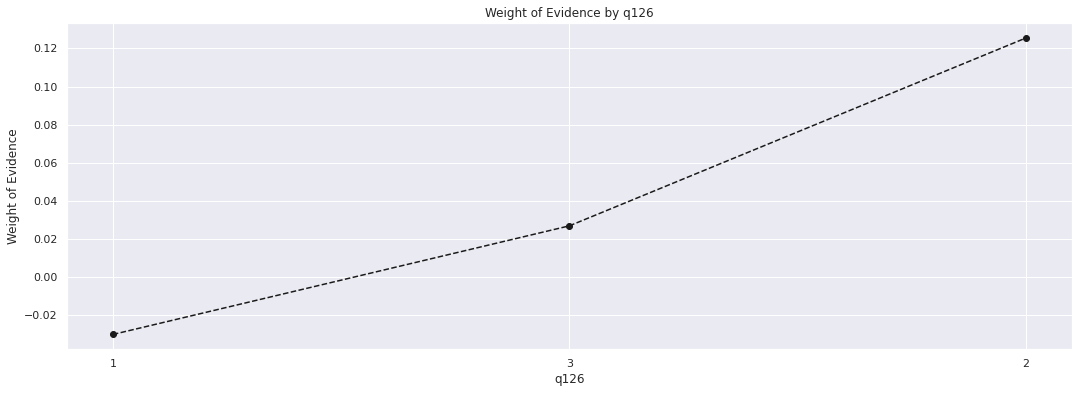

In [15]:
plot_by_woe(woe_discrete(X_train_with_missing, 'q126', y_train))

### one-hot coding for some variables  

In [5]:
#those variables without missing values 

df_final = pandas.get_dummies(df_final, columns=['risk'])

df_final = pandas.get_dummies(df_final, columns=['q126'])

df_final = pandas.get_dummies(df_final, columns=['q144'])

df_final = pandas.get_dummies(df_final, columns=['q7q8'])

df_final = pandas.get_dummies(df_final, columns=['q9'])

df_final = pandas.get_dummies(df_final, columns=['q11'])

df_final = pandas.get_dummies(df_final, columns=['q12'])

df_final = pandas.get_dummies(df_final, columns=['q13'])

df_final = pandas.get_dummies(df_final, columns=['q14y'])

df_final = pandas.get_dummies(df_final, columns=['q14ysu2'])

df_final = pandas.get_dummies(df_final, columns=['q15d2'])

df_final = pandas.get_dummies(df_final, columns=['q15z'])

df_final = pandas.get_dummies(df_final, columns=['q24a'])

df_final = pandas.get_dummies(df_final, columns=['q24b'])

df_final = pandas.get_dummies(df_final, columns=['q24c'])

df_final = pandas.get_dummies(df_final, columns=['q78'])

df_final = pandas.get_dummies(df_final, columns=['q103106'])

df_final = pandas.get_dummies(df_final, columns=['q120'])

In [6]:
#those variables with missing values but handled 
# df_final = df_final.drop(df_final[df_final['q15_1'] == -99.99].index)
# df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q15_').columns.tolist())

# df_final[df_final.filter(like='q35b').columns.tolist()+df_final.filter(like='q53').columns.tolist()].replace(-99.99,0.00,inplace=True)

df_temp  = df_final.copy()
cols = df_temp.filter(like='q35b').columns.tolist()+df_temp.filter(like='q53').columns.tolist()
df_final[cols] = df_temp[cols].replace(-99.99,0.00,inplace=False)



In [7]:
# for example, question 15 current external finance
print(df_final.filter(like='q15_').head(0))
print(df_final['q15_1'].value_counts())
# drop q15_1 where values equal to -99.99
df_final = df_final.drop(df_final[df_final['q15_1'] == -99.99].index)
print(df_final['q15_1'].value_counts())

Empty DataFrame
Columns: [q15_1, q15_2, q15_3, q15_4, q15_5, q15_6, q15_7, q15_8, q15_9, q15_10, q15_11, q15_12, q15_13, q15_14, q15_15, q15_16, q15_17, q15_18, q15_19, q15_20]
Index: []
 0.00     1195
 1.00     1128
-99.99       5
Name: q15_1, dtype: int64
0.0    1195
1.0    1128
Name: q15_1, dtype: int64


In [8]:
#those variables with missing values but not handled 
df_final = pandas.get_dummies(df_final, columns=['q11a'])

df_final = pandas.get_dummies(df_final, columns=['q13a'])

df_final = pandas.get_dummies(df_final, columns=['q13b'])

df_final = pandas.get_dummies(df_final, columns=['q14a'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q15b_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=['q15c'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q17_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q26_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=['q27'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q28_').columns.tolist())

df_temp  = df_final.copy()
cols = df_temp.filter(like='q38').columns.tolist()+df_temp.filter(like='q56').columns.tolist()
df_final[cols] = df_temp[cols].replace([-99.99, 3.00],0.00,inplace=False)

df_final['q38_56'] = -99.99
for i in cols:
    df_final.loc[df_final[i] == 1.00,'q38_56'] = 1.00
    df_final.loc[df_final[i] == 2.00,'q38_56'] = 2.00
    df_final.drop(i,axis=1,inplace=True)

df_final = pandas.get_dummies(df_final, columns=['q38_56'])

df_temp  = df_final.copy()
cols = df_temp.filter(like='q42').columns.tolist()+df_temp.filter(like='q60').columns.tolist()
df_final[cols] = df_temp[cols].replace([-99.99, 3.00],0.00,inplace=False)

df_final['q42_60'] = -99.99
for i in cols:
    df_final.loc[df_final[i] == 1.00,'q42_60'] = 1.00
    df_final.loc[df_final[i] == 2.00,'q42_60'] = 2.00
    df_final.drop(i,axis=1,inplace=True)

df_final = pandas.get_dummies(df_final, columns=['q42_60'])

df_temp  = df_final.copy()
cols = df_temp.filter(like='q43').columns.tolist()+df_temp.filter(like='q61').columns.tolist()
df_final[cols] = df_temp[cols].replace([-99.99, 3.00],0.00,inplace=False)

df_final['q43_61'] = -99.99
for i in cols:
    df_final.loc[df_final[i] == 1.00,'q43_61'] = 1.00
    df_final.loc[df_final[i] == 2.00,'q43_61'] = 2.00
    df_final.drop(i,axis=1,inplace=True)

df_final = pandas.get_dummies(df_final, columns=['q43_61'])

df_final = pandas.get_dummies(df_final, columns=['q78b'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q78c').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q81').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='q84_').columns.tolist())

df_final = pandas.get_dummies(df_final, columns=['q85'])

df_final = pandas.get_dummies(df_final, columns=['q111112'])

df_final = pandas.get_dummies(df_final, columns=['q113'])

df_final = pandas.get_dummies(df_final, columns=df_final.filter(like='qbb').columns.tolist())

df_final['q115_116']  = -99.99
df_final.loc[df_final['q115'] == 3.00,'q115_116'] = 0.00
df_final.loc[df_final['q116_p'] == 1.00,'q115_116'] = 1.00
df_final.loc[df_final['q116_p'] == 2.00,'q115_116'] = 2.00
df_final.loc[df_final['q116_p'] == 3.00,'q115_116'] = 3.00
df_final.loc[df_final['q116_p'] == 4.00,'q115_116'] = 4.00
df_final.loc[df_final['q116_p'] == 5.00,'q115_116'] = 5.00
df_final.loc[df_final['q116_l'] == 1.00,'q115_116'] = -1.00
df_final.loc[df_final['q116_l'] == 2.00,'q115_116'] = -2.00
df_final.loc[df_final['q116_l'] == 3.00,'q115_116'] = -3.00
df_final.loc[df_final['q116_l'] == 4.00,'q115_116'] = -4.00
df_final.loc[df_final['q116_l'] == 5.00,'q115_116'] = -5.00

df_final = pandas.get_dummies(df_final, columns=['q115_116'])

df_final = pandas.get_dummies(df_final, columns=['q117'])

df_final = pandas.get_dummies(df_final, columns=['q119'])

In [9]:
# for examople, question Q.11a Is your business a family owned business, that is one which is majority owned by members of the same family?
print(df_final.filter(like='q11a_').head(0))
print(df_final['q11a_-99.99'].value_counts())

Empty DataFrame
Columns: [q11a_-99.99, q11a_1.0, q11a_2.0, q11a_3.0, q11a_4.0]
Index: []
0    2044
1     279
Name: q11a_-99.99, dtype: int64


In [10]:
# for example, there are massive missing values in q17, i.e. question 17 source of finance to establish the business: XXXXXXX
print(df_final[df_final.filter(like='q17_').columns.tolist()].value_counts())

q17_1_-99.99  q17_1_0.0  q17_1_1.0  q17_2_-99.99  q17_2_0.0  q17_2_1.0  q17_3_-99.99  q17_3_0.0  q17_3_1.0  q17_4_-99.99  q17_4_0.0  q17_4_1.0  q17_5_-99.99  q17_5_0.0  q17_5_1.0  q17_6_-99.99  q17_6_0.0  q17_6_1.0  q17_7_-99.99  q17_7_0.0  q17_7_1.0  q17_8_-99.99  q17_8_0.0  q17_8_1.0  q17_9_-99.99  q17_9_0.0  q17_9_1.0  q17_10_-99.99  q17_10_0.0  q17_10_1.0  q17_11_-99.99  q17_11_0.0  q17_12_-99.99  q17_12_0.0  q17_13_-99.99  q17_13_0.0  q17_13_1.0  q17_14_-99.99  q17_14_0.0  q17_14_1.0  q17_15_-99.99  q17_15_0.0  q17_15_1.0  q17_16_-99.99  q17_16_0.0  q17_16_1.0  q17_17_-99.99  q17_17_0.0  q17_17_1.0  q17_18_-99.99  q17_18_0.0  q17_18_1.0  q17_19_-99.99  q17_19_0.0  q17_19_1.0
1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0          0          1             0        

In [11]:
# even though no missing value existing, there is still troublesome data, so we need to handle it
# another example, question Q9 annual turnover (option 14 DK and 15 Refused)
print(df_final.filter(like='q9_').head(0))
print(df_final['q9_14'].value_counts(),'\n',df_final['q9_15'].value_counts())


Empty DataFrame
Columns: [q9_1, q9_2, q9_3, q9_4, q9_5, q9_6, q9_7, q9_8, q9_9, q9_10, q9_11, q9_12, q9_14, q9_15]
Index: []
0    2120
1     203
Name: q9_14, dtype: int64 
 0    2108
1     215
Name: q9_15, dtype: int64


In [12]:
# df_final = pandas.get_dummies(df_final, columns=['q17_1'])
# print(df_final.filter(like='q35b').head(0))
# print(df_final.filter(like='q38').columns.tolist())
print(df_final[df_final.filter(like='q38').columns.tolist()].value_counts())

q38_1_1  q38_1_2  q38_1_3  q38_1_4  q38_1_7  q38_1_8  q38_1_9  q38_1_10  q38_1_11  q38_1_12  q38_1_13  q38_1_14  q38_1_15  q38_1_16  q38_1_18  q38_2_1  q38_2_2  q38_2_3  q38_2_4  q38_2_7  q38_2_8  q38_2_9  q38_2_10  q38_2_11  q38_2_12  q38_2_13  q38_2_14  q38_2_15  q38_2_16  q38_2_18  q38_3_1  q38_3_2  q38_3_3  q38_3_4  q38_3_7  q38_3_8  q38_3_9  q38_3_10  q38_3_11  q38_3_12  q38_3_13  q38_3_14  q38_3_15  q38_3_16  q38_3_18  q38_4_1  q38_4_2  q38_4_3  q38_4_4  q38_4_7  q38_4_8  q38_4_9  q38_4_10  q38_4_11  q38_4_12  q38_4_13  q38_4_14  q38_4_15  q38_4_16  q38_4_18
-99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99   -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    -99.99    

In [13]:
print(df_final['q17_1_-99.99'].value_counts())

1    2137
0     186
Name: q17_1_-99.99, dtype: int64


In [31]:
df_final['q115_116']  = -99.99
df_final.loc[df_final['q115'] == 3.00,'q115_116'] = 0.00
df_final.loc[df_final['q116_p'] == 1.00,'q115_116'] = 1.00
df_final.loc[df_final['q116_p'] == 2.00,'q115_116'] = 2.00
df_final.loc[df_final['q116_p'] == 3.00,'q115_116'] = 3.00
df_final.loc[df_final['q116_p'] == 4.00,'q115_116'] = 4.00
df_final.loc[df_final['q116_p'] == 5.00,'q115_116'] = 5.00
df_final.loc[df_final['q116_l'] == 1.00,'q115_116'] = -1.00
df_final.loc[df_final['q116_l'] == 2.00,'q115_116'] = -2.00
df_final.loc[df_final['q116_l'] == 3.00,'q115_116'] = -3.00
df_final.loc[df_final['q116_l'] == 4.00,'q115_116'] = -4.00
df_final.loc[df_final['q116_l'] == 5.00,'q115_116'] = -5.00

print(df_final['q115_116'].value_counts())

-99.99    639
 3.00     465
 4.00     317
 2.00     290
 5.00     134
 0.00     114
 1.00     110
-2.00      93
-3.00      74
-1.00      44
-4.00      34
-5.00       9
Name: q115_116, dtype: int64


In [34]:
print(df_final['q120'].value_counts())

# print(df_final[df_final.filter(like='qbb').columns.tolist()].value_counts())

14    657
1     462
15    441
2     159
5     141
6     109
7      83
3      83
4      66
8      60
9      38
10     16
11      6
12      1
13      1
Name: q120, dtype: int64


In [ ]:
# WoE Binning and Feature Engineering